In [1]:
import matplotlib.pyplot as plt
import numpy             as np

import gym
import Portfolio_Gym
import A2C_III as A2C

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)
/Users/jakefowler/Documents/GitHub/rl-portfolio/A2C Agent/A2C_III.py:126: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-X))
/Users/jakefowler/Documents/GitHub/rl-portfolio/A2C Agent/A2C_III.py:31: RuntimeWarning: overflow encountered in exp
  return 1.0 / (1.0 + np.exp(-X))


CPU times: user 3min 36s, sys: 2.98 s, total: 3min 39s
Wall time: 3min 40s


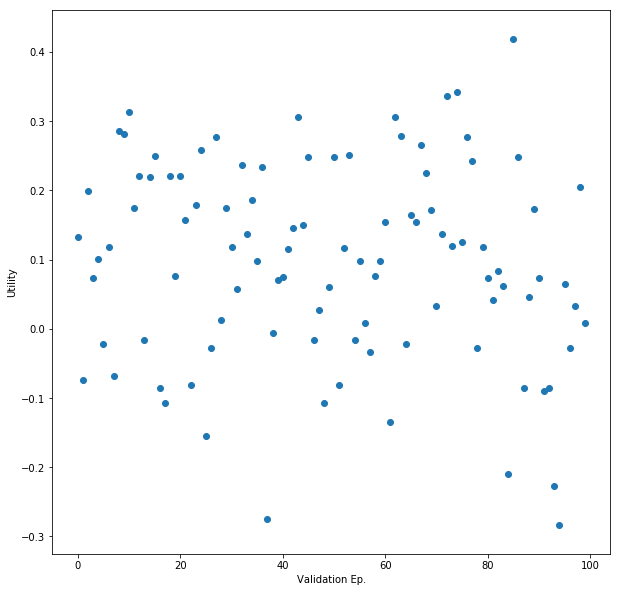

In [2]:
%%time

# Model Parameters.
Retrain_Frequency = 10
Sigma_Range       = [2, 0.05]
Sigma_Anneal      = 1

Gamma  = 0.999
N_Eps  = int(1e4)

Actor_Hypers   = {"Learning Rate" : 0.075,
                  "Epoch"         : 1,
                  "Network Size"  : [4,4],
                  "Activation"    : "Sigmoid",
                  "Alpha"         : 0.10}

Critic_Hypers = {"Learning Rate" : 0.05,
                 "Epoch"         : 10,
                 "Network Size"  : [4,4],
                 "Activation"    : "Sigmoid",
                 "Alpha"         : 0.001}

Env = gym.make('Historical_Monthly-v0')
Env.Set_Params(Risk_Aversion = 1,  Episode_Length = 12,  Max_Leverage  = 750,
               Min_Leverage = -750,  Validation_Frac = 0.3)

myAC = A2C.Actor_Critic(Env, Actor_Hypers, Critic_Hypers, Gamma, Sigma_Range,
                        Sigma_Anneal, Retrain_Frequency)
myAC.Plot_Frequency = 0  # Dissables plotting (Since this only supports sim env.)

myAC.Train(N_Eps)
Results = myAC.Validate(100)

f, ax = plt.subplots(1,1, figsize = (10,10))
ax.scatter(np.arange(len(Results)), Results)
ax.set_ylabel("Utility")
ax.set_xlabel("Validation Ep.")
